In [ ]:
# Windows PC2

In [20]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()

import cellrank as cr
cr.settings.verbosity = 3
cr.logging.print_versions()

import matplotlib.pyplot as pl
from matplotlib import rcParams

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5
scvelo==0.2.4  scanpy==1.8.2  anndata==0.7.8  loompy==3.0.6  numpy==1.21.5  scipy==1.7.3  matplotlib==3.5.1  sklearn==1.0.2  pandas==1.3.5  
cellrank==1.5.1 scanpy==1.8.2 anndata==0.7.8 numpy==1.21.5 numba==0.55.0 scipy==1.7.3 pandas==1.3.5 pygpcca==1.0.3 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 scvelo==0.2.4 pygam==0.8.0 matplotlib==3.5.1 seaborn==0.11.2


In [21]:
adata = sc.datasets.pbmc3k()

In [22]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


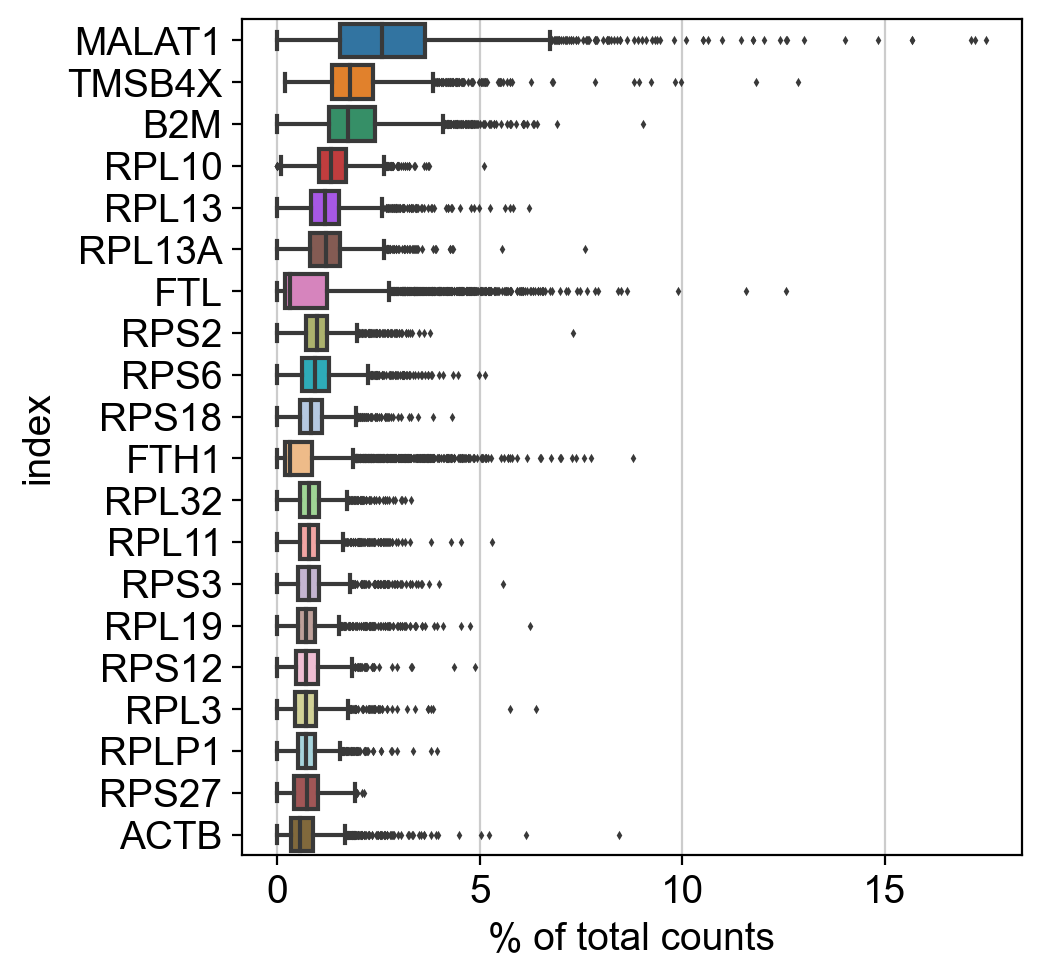

filtered out 23577 genes that are detected in less than 25 cells


In [23]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=25)

In [24]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['rpl'] = adata.var_names.str.startswith('RPL')
adata.var['rps'] = adata.var_names.str.startswith('RPS')
adata

AnnData object with n_obs × n_vars = 2700 × 9161
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps'

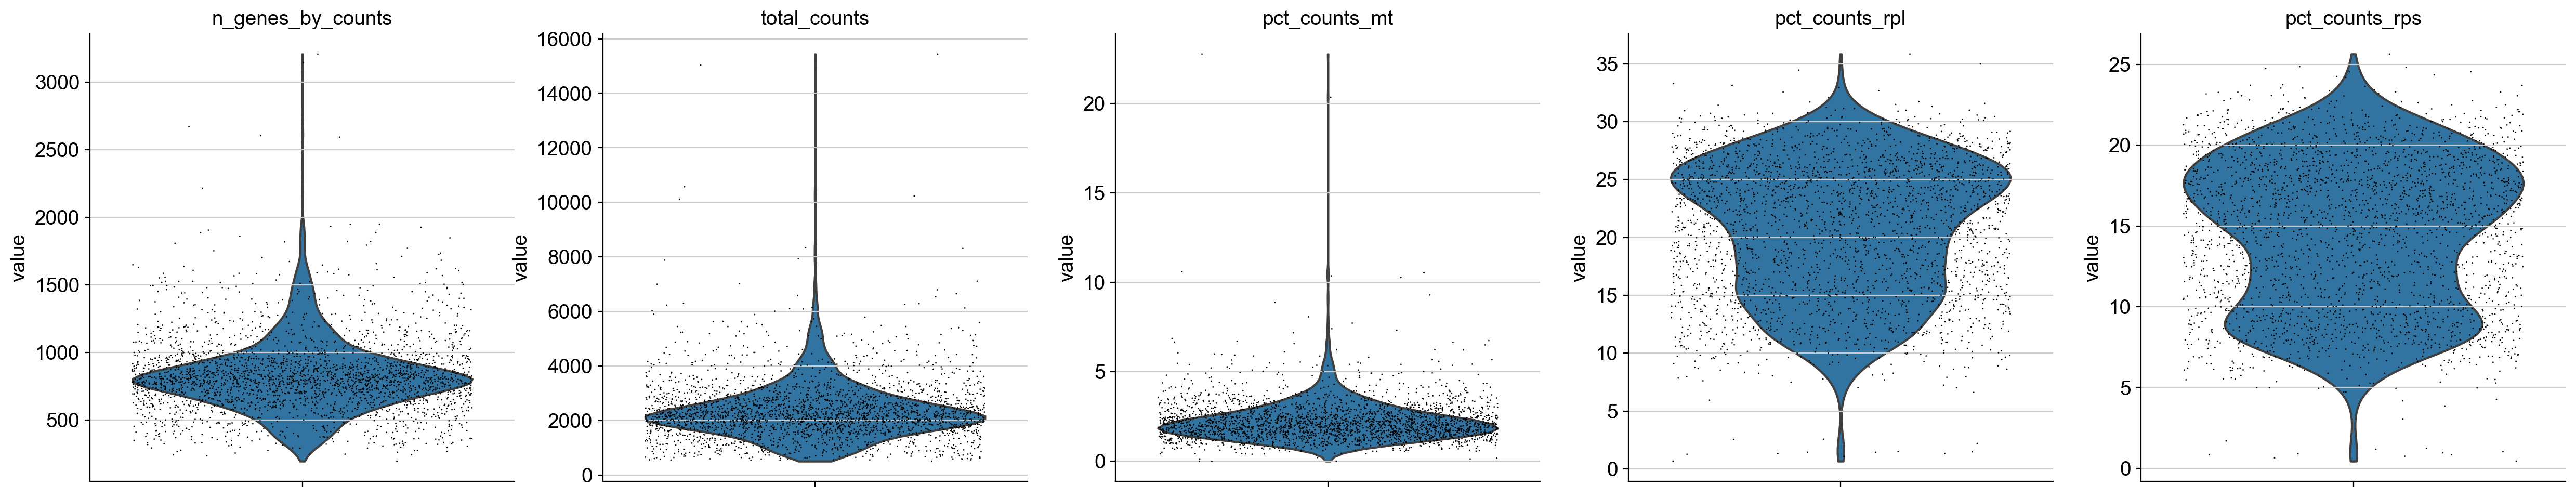

AnnData object with n_obs × n_vars = 2700 × 9161
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [25]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','rpl','rps'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_rpl','pct_counts_rps'], jitter=0.4, multi_panel=True)
adata

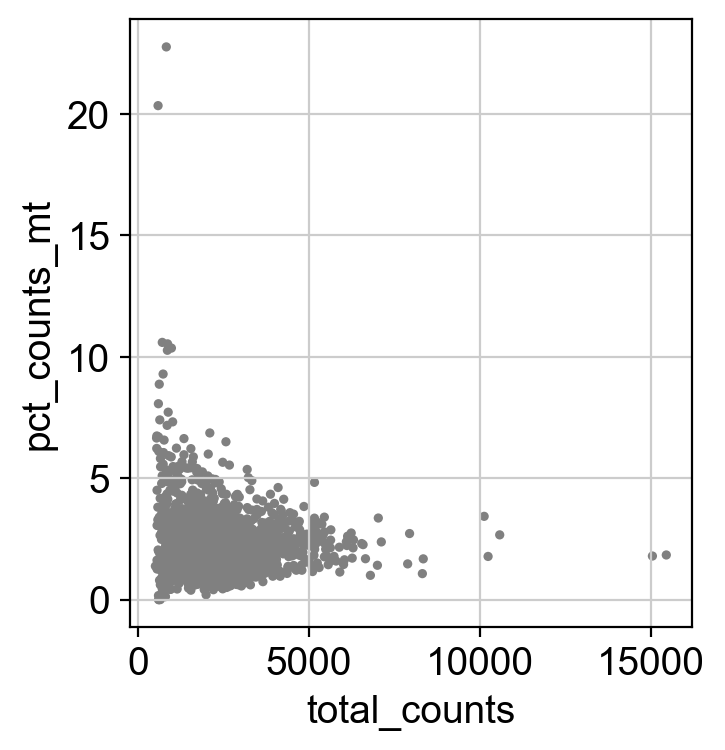

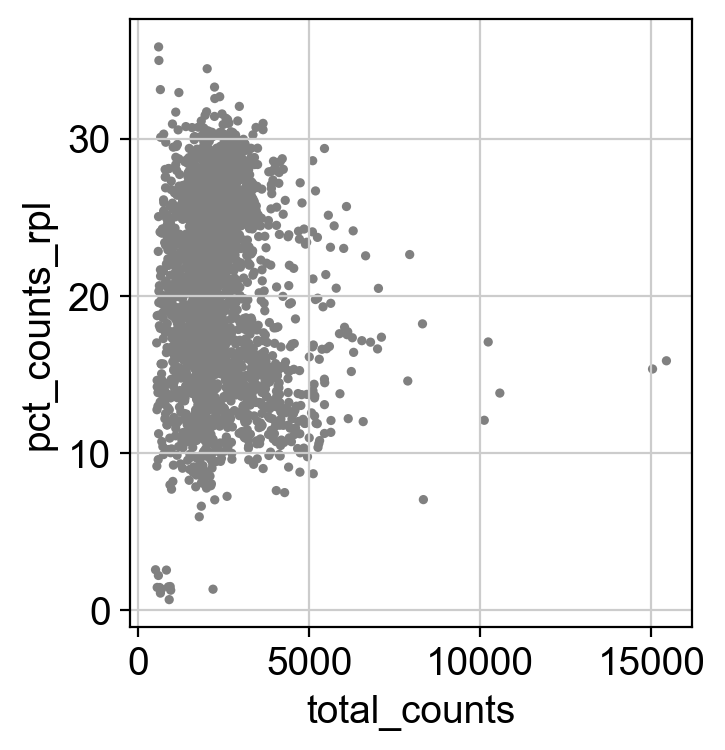

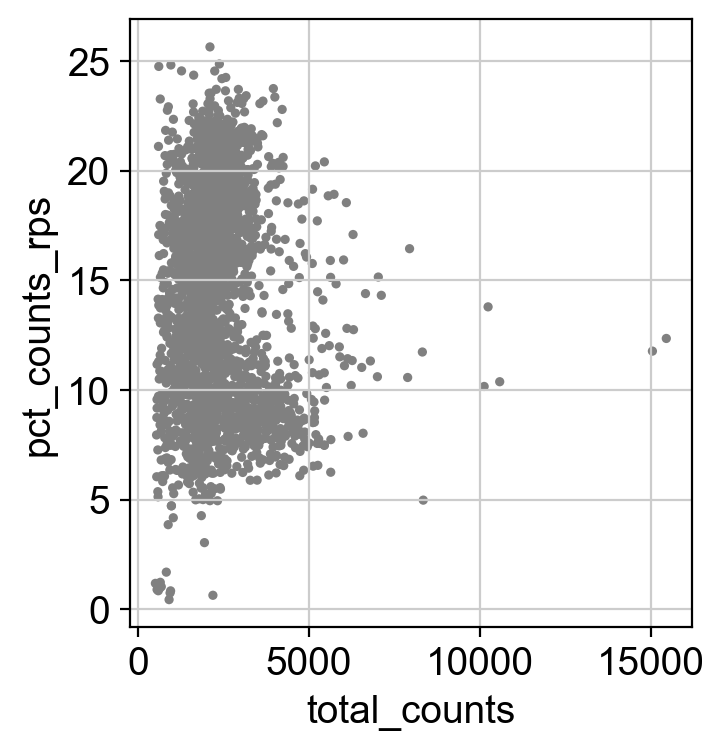

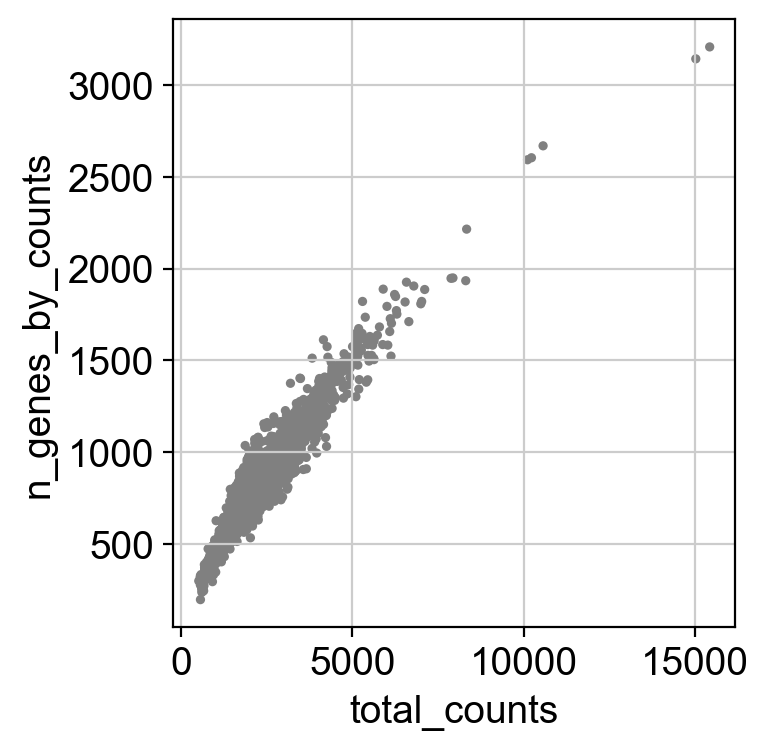

In [26]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_rpl')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_rps')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [27]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 50, :]
adata = adata[adata.obs.pct_counts_rpl < 50, :]
adata = adata[adata.obs.pct_counts_rps < 50, :]
adata

View of AnnData object with n_obs × n_vars = 2700 × 9161
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [28]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata

normalizing counts per cell
    finished ({time_passed})


C:\Users\Park_Lab\anaconda3\envs\HYJ_py38\lib\site-packages\scanpy\preprocessing\_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 2700 × 9161
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


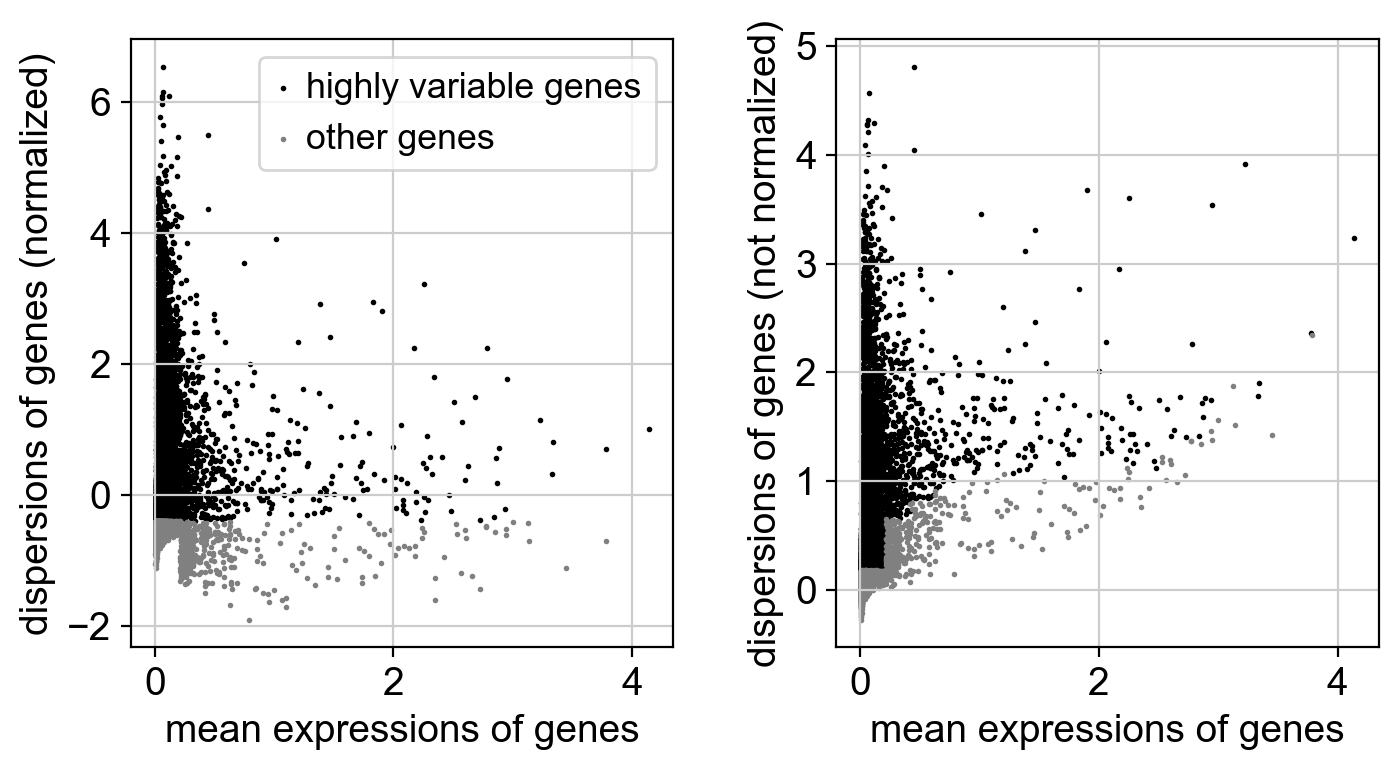

5000


AnnData object with n_obs × n_vars = 2700 × 9161
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [29]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.pl.highly_variable_genes(adata)
print(sum(adata.var.highly_variable))
adata

In [30]:
adata.raw=adata

In [31]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 2700 × 5000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [32]:
sc.pp.regress_out(adata, keys=['pct_counts_mt','pct_counts_rpl','pct_counts_rps'], n_jobs=16)
sc.pp.scale(adata, max_value=10)
adata

regressing out ['pct_counts_mt', 'pct_counts_rpl', 'pct_counts_rps']
    sparse input is densified and may lead to high memory use
    finished (0:00:02)


AnnData object with n_obs × n_vars = 2700 × 5000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [33]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=50, knn=True)
sc.tl.leiden(adata, resolution=1)
sc.tl.umap(adata)
adata

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


AnnData object with n_obs × n_vars = 2700 × 5000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

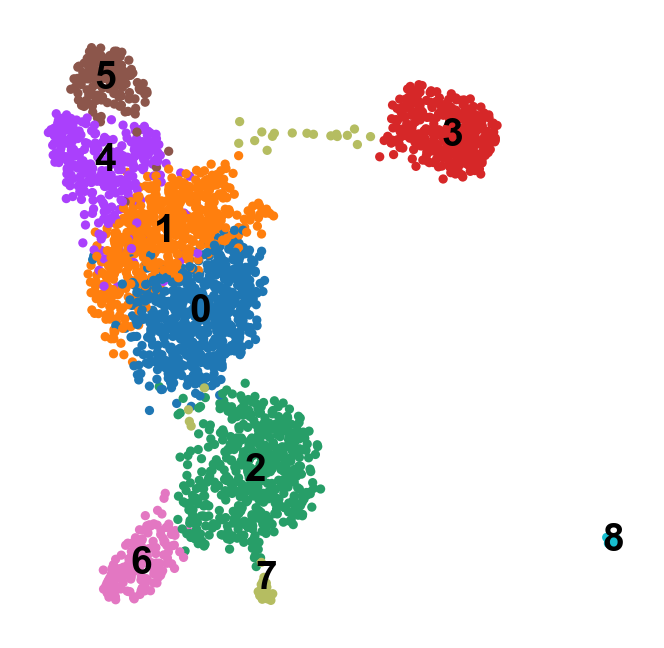

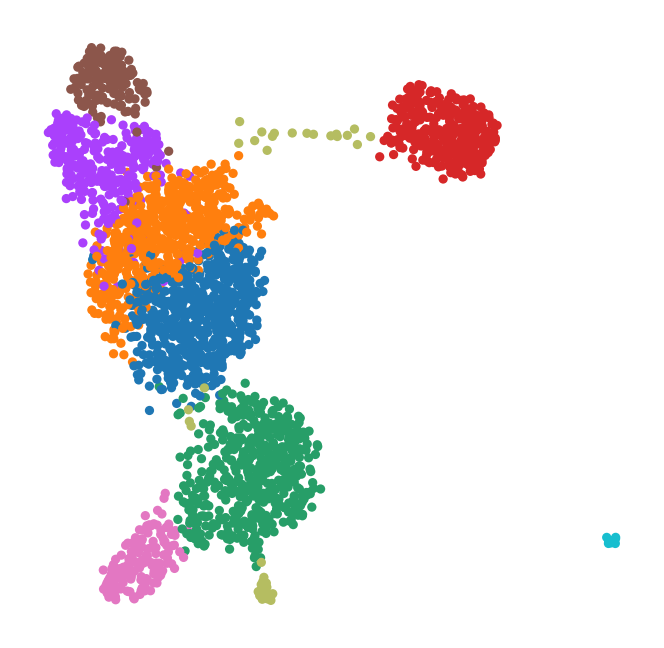

In [34]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', frameon=False, title='', use_raw=False)
sc.pl.umap(adata, color=['leiden'], legend_loc='', frameon=False, title='', save='ACT.pdf', use_raw=False)

In [36]:
!numba -s

System info:
--------------------------------------------------------------------------------
__Time Stamp__
Report started (local time)                   : 2022-01-19 10:34:43.481584
UTC start time                                : 2022-01-19 16:34:43.481584
Running time (s)                              : 4.824697

__Hardware Information__
Machine                                       : AMD64
CPU Name                                      : skylake
CPU Count                                     : 16
Number of accessible CPUs                     : 16
List of accessible CPUs cores                 : 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
CFS Restrictions (CPUs worth of runtime)      : None

CPU Features                                  : 64bit adx aes avx avx2 bmi bmi2
                                                clflushopt cmov cx16 cx8 f16c fma
                                                fsgsbase fxsr invpcid lzcnt mmx
                                                movbe pclmul pop